In [263]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler as SS
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [264]:
data=pd.read_csv(r"bank-full.csv",sep=";")

In [265]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [267]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [268]:
data.shape

(45211, 17)

In [269]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [270]:
X=data[data.columns[:-1]]
y=data[data.columns[-1]]

In [271]:
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

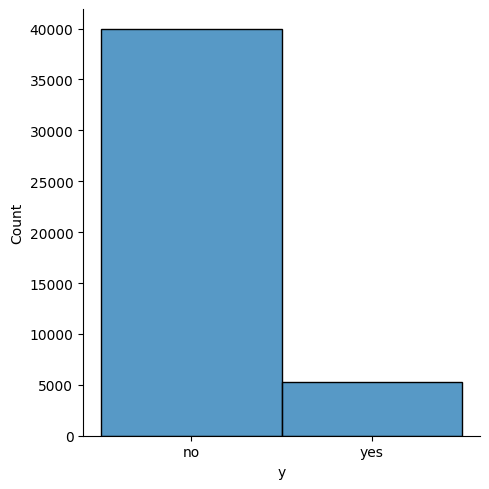

In [272]:
sns.displot(y)

In [273]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42,test_size=0.3)
ytrain.columns=['y']
ytest.columns=['y']

In [274]:
standard_scaler=SS()

num_cols=xtrain.select_dtypes(include=['int64','float64']).columns
xtrain[num_cols]=pd.DataFrame(standard_scaler.fit_transform(xtrain[num_cols]),columns=num_cols,index=xtrain.index)
xtest[num_cols]=pd.DataFrame(standard_scaler.transform(xtest[num_cols]),columns=num_cols,index=xtest.index)

In [275]:
objcols=xtrain.select_dtypes(include="object")
encoding_threshold=np.int64(objcols.value_counts().mean())

oe_cols=[]
oh_cols=[]

for i in objcols.columns:
    if (objcols[i].nunique()) > encoding_threshold :
        oh_cols.append(i)
    else:
        oe_cols.append(i)

In [276]:
Ord_encoder=OrdinalEncoder()
xtrain[oe_cols]=pd.DataFrame(Ord_encoder.fit_transform(xtrain[oe_cols]),columns=oe_cols,index=xtrain.index)
xtest[oe_cols]=pd.DataFrame(Ord_encoder.transform(xtest[oe_cols]),columns=oe_cols,index=xtest.index)

In [277]:
ytrain=pd.Series(ytrain)
ytest=pd.Series(ytest)

ytrain_df=ytrain.to_frame()
ytest_df=ytest.to_frame()

ytrain_df_encoded=Ord_encoder.fit_transform(ytrain_df)
ytest_df_encoded=Ord_encoder.transform(ytest_df)

ytrain=ytrain_df_encoded.flatten()
ytest=ytest_df_encoded.flatten()



In [278]:
Oh_encoder=OneHotEncoder(sparse_output=False)
train_oh=pd.DataFrame(Oh_encoder.fit_transform(xtrain[oh_cols]),columns=Oh_encoder.get_feature_names_out(),index=xtrain.index)
test_oh=pd.DataFrame(Oh_encoder.transform(xtest[oh_cols]),columns=Oh_encoder.get_feature_names_out(),index=xtest.index)

xtrain=xtrain.join(train_oh)
xtest=xtest.join(test_oh)
xtrain.drop(oh_cols,axis=1,inplace=True)
xtest.drop(oh_cols,axis=1,inplace=True)

In [279]:
ytrain_s=pd.Series(ytrain)
ytest_s=pd.Series(ytest)

In [280]:
xtrain.columns

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [281]:
job_cols=['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown']
threshold=pd.DataFrame(xtrain[job_cols].sum()).quantile(0.25)
a= [x for x in job_cols if xtrain[x].sum() < (threshold[0])]

xtrain['job_other']=0
xtest['job_other']=0
for x in a:
       xtrain['job_other']+=xtrain[x]
       xtest['job_other']+=xtest[x]


xtrain.drop(xtrain[a],axis=1,inplace=True)
xtest.drop(xtest[a],axis=1,inplace=True)

In [282]:
month_cols=['month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']

threshold=pd.DataFrame(xtrain[month_cols].sum()).quantile(0.25)

a= [x for x in month_cols if xtrain[x].sum() < (threshold[0])]

xtrain['month_other']=0
xtest['month_other']=0
for x in a:
       xtrain['month_other']+=xtrain[x]
       xtest['month_other']+=xtest[x]

xtrain.drop(xtrain[a],axis=1,inplace=True)
xtest.drop(xtest[a],axis=1,inplace=True)

In [285]:
traindat=pd.concat([xtrain,ytrain_s],axis=1)
traindat.corr()[0]

age                  0.000549
marital              0.008271
education           -0.019893
default             -0.001335
balance              0.002286
housing              0.004399
loan                -0.004333
contact              0.013614
day                 -0.002358
duration             0.008877
campaign             0.002765
pdays               -0.000031
previous            -0.003625
poutcome            -0.002827
job_admin.           0.009118
job_blue-collar      0.001974
job_entrepreneur     0.000900
job_management      -0.003805
job_retired         -0.001278
job_self-employed   -0.002024
job_services        -0.003432
job_technician      -0.004107
job_unemployed      -0.005501
month_apr            0.008569
month_aug           -0.004826
month_feb           -0.003967
month_jan           -0.004520
month_jul           -0.001695
month_jun            0.010478
month_may            0.000676
month_nov            0.002454
month_oct            0.007141
job_other            0.008956
month_othe

In [286]:
from sklearn.decomposition import PCA

pca=PCA(n_components=)
pca.fit_transform(xtrain)

array([[ 1.00747168,  0.58316082],
       [ 0.56795229, -0.29712323],
       [ 0.79562403, -1.05765621],
       ...,
       [ 0.36351033, -0.11056154],
       [ 0.74476145, -0.68606786],
       [ 0.87258061,  2.04096634]])

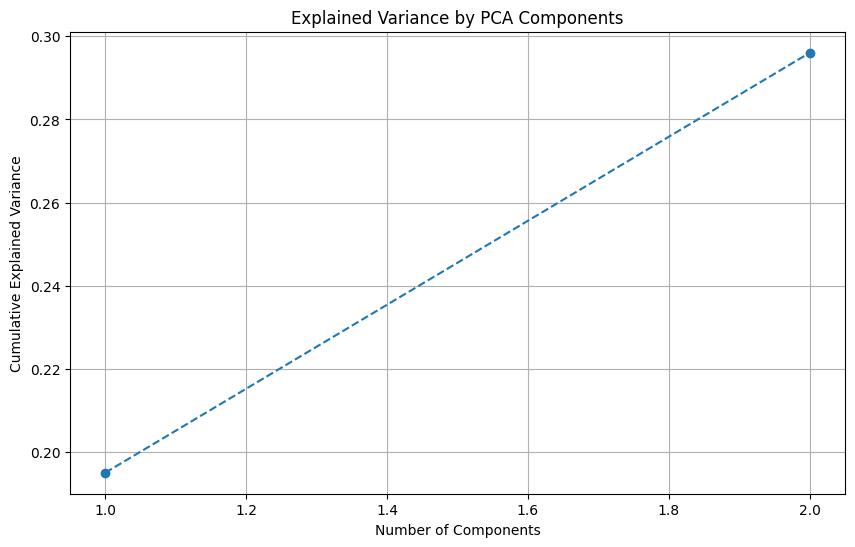

In [287]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()